In [42]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as Soup
import pandas as pd
import time
import numpy as np
import dtw
import matplotlib.pyplot as plt
import csv
import kss
from sklearn.preprocessing import *
import ema


In [20]:
options = webdriver.ChromeOptions()
prefs = {'profile.default_content_setting_values': {'cookies' : 2, 'images': 2, 'plugins' : 2, 'popups': 2, 'geolocation': 2, 'notifications' : 2, 'auto_select_certificate': 2, 'fullscreen' : 2, 'mouselock' : 2, 'mixed_script': 2, 'media_stream' : 2, 'media_stream_mic' : 2, 'media_stream_camera': 2, 'protocol_handlers' : 2, 'ppapi_broker' : 2, 'automatic_downloads': 2, 'midi_sysex' : 2, 'push_messaging' : 2, 'ssl_cert_decisions': 2, 'metro_switch_to_desktop' : 2, 'protected_media_identifier': 2, 'app_banner': 2, 'site_engagement' : 2, 'durable_storage' : 2}}   
options.add_experimental_option('prefs', prefs)
#options.headless = True
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)")
driver = webdriver.Chrome(options=options)


driver.get("https://news.daum.net/breakingnews/society?page=1&regDate=20230101")
    
html = driver.page_source
soup = Soup(html, 'html.parser')
header_list = []
data_ix = pd.date_range("2023/01/01",periods=274,freq="D")

df_header = pd.DataFrame(columns=['header'], index= data_ix)

for i in range(274):
    driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/div/span/a[10]").click()
    for j in range(10):
        for n in range(1, 15) :
            n = str(n)
            try :
                header_list.append(driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/ul/li["+n+"]/div/strong/a").text)
            except :
                break
        try :
            driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/div/span/a[11]").click()
        except :
            break
        time.sleep(1)
    df_header.iat[i,0] = header_list
    header_list = []
    driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[1]/div[1]/div/div[1]/a[3]').click()
    time.sleep(1)
    
df_header.to_csv('daum_header 2023.csv', sep=',', float_format='%.64f')
print("complete")

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=117.0.5938.149)
Stacktrace:
	GetHandleVerifier [0x00007FF6F895AFD2+57938]
	(No symbol) [0x00007FF6F88C7C02]
	(No symbol) [0x00007FF6F877DAAB]
	(No symbol) [0x00007FF6F875DEE8]
	(No symbol) [0x00007FF6F87E3507]
	(No symbol) [0x00007FF6F87F6F1F]
	(No symbol) [0x00007FF6F87DE8C3]
	(No symbol) [0x00007FF6F87B36D1]
	(No symbol) [0x00007FF6F87B4914]
	GetHandleVerifier [0x00007FF6F8CBE772+3611122]
	GetHandleVerifier [0x00007FF6F8D11640+3950784]
	GetHandleVerifier [0x00007FF6F8D0A6EF+3922287]
	GetHandleVerifier [0x00007FF6F89F8996+703510]
	(No symbol) [0x00007FF6F88D2B98]
	(No symbol) [0x00007FF6F88CE754]
	(No symbol) [0x00007FF6F88CE882]
	(No symbol) [0x00007FF6F88BF2A3]
	BaseThreadInitThunk [0x00007FFEDF407344+20]
	RtlUserThreadStart [0x00007FFEE04C26B1+33]


In [2]:

df_concat = pd.DataFrame()
years = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019_0815", "2019_0816", "2019_0817_1231", "2020", "2021", "2022"]
for i in years :
    df_years = pd.read_csv("daum_header "+i+".csv")
    df_concat = pd.concat([df_concat, df_years])
print(df_concat)

     Unnamed: 0                                             header
0    2012-01-01  ['밤사이 영동 많은 눈..출근길 영하권 추위', '"일진회 해체" 형사 1만200...
1    2012-01-02  ['스스로 \'개\'에 비유.."모두 외면했다" 자포자기', "[집중취재] 중학생의...
2    2012-01-03  ['4대강 사업 수질조사', "'종업원 범죄땐 업주도 처벌' 청소년보호법 양벌규정 ...
3    2012-01-04  ['종편 특혜 \'미디어렙법안\' 5일 처리언론단체 "방송사 이전투구 불보듯"', ...
4    2012-01-05  ['반기문 총장 "적절한 시기 방북 용의"<교도통신>', '[부음] 신강균씨(MBC...
..          ...                                                ...
360  2022-12-27  ['광주·전남소방 폭설 관련 신고 ‘낙상’ 최다', '무너진 축사서 가축 동사까지…...
361  2022-12-28  ['파업현장 경찰청장 방문 날 쇠못 뿌린 화물연대 노조원 검거', '이태원역 1번 ...
362  2022-12-29  ['자동심장충격기 의무화 1주일…준비 안 된 현장과 정부', '부전천 복원 재추진…...
363  2022-12-30  ['지금은 ‘유령 아파트’가 됐습니다…여전한 ‘코로나 낙인’', '여수 향일암, 연...
364  2022-12-31  ['1048회 로또 1등 17명 16억1249만원씩…자동 13명·수동 4명(종합)'...

[4015 rows x 2 columns]


In [3]:
df_p_t = pd.date_range("2012/01/01",periods=4015,freq="D")
df_pr = pd.DataFrame(columns=['pr_header', 'cnt'], index= df_p_t)
for q, b in zip(df_concat["header"], range(4015)) :
    tt = kss.split_morphemes(q, return_pos = False)
    
    df_pr.iat[b,0] = tt
print(df_pr)

[Kss]: Oh! You have mecab in your environment. Kss will take this as a backend! :D



                                                    pr_header  cnt
2012-01-01  [[, ', 밤사이, 영동, 많, 은, 눈, ., ., 출근길, 영하, 권, 추위,...  NaN
2012-01-02  [[, ', 스스로, \', 개, \', 에, 비유, ., .", 모두, 외면, 했...  NaN
2012-01-03  [[, ', 4, 대강, 사업, 수질, 조사, ',, "', 종업원, 범죄, 땐, ...  NaN
2012-01-04  [[, ', 종편, 특혜, \', 미디어, 렙, 법안, \', 5, 일, 처리, 언...  NaN
2012-01-05  [[, ', 반기문, 총장, ", 적절, 한, 시기, 방북, 용, 의, "<, 교도...  NaN
...                                                       ...  ...
2022-12-24  [[, ', 광주, ·, 전남, 소방, 폭설, 관련, 신고, ‘, 낙상, ’, 최다...  NaN
2022-12-25  [[, ', 파업, 현장, 경찰, 청장, 방문, 날, 쇠못, 뿌린, 화물, 연대, ...  NaN
2022-12-26  [[, ', 자, 동심, 장충, 격기, 의무, 화, 1, 주일, …, 준비, 안, ...  NaN
2022-12-27  [[, ', 지금, 은, ‘, 유령, 아파트, ’, 가, 됐, 습니다, …, 여전,...  NaN
2022-12-28  [[, ', 1048, 회, 로또, 1, 등, 17, 명, 16, 억, 1249, ...  NaN

[4015 rows x 2 columns]


In [4]:
hate = "갈등 추락 기소 불편 거짓 난동 폭언 부글부글 인재 아동학대 사망 책임 산재 배신 촉법소년 마약 슬쩍 난입 흉기 살인미수 괴롭힘 우울 우울감 폭력 욕설 비극 비상 폐쇄 유출 횡령 희롱 방화 우울증 차별 숨져 논란 항의 투신 통곡 살해 사고 고독사 숨진채 흉악범죄 얼룩 중독 학폭 사망 불법 비판 기피 무시 슬쩍 후유증 적신호 사기 피싱 거부 블랙리스트 갑질 중상 하락 반발 비극 비리 자살 침해 외로움 규탄 꼼수 진상 "
hate = hate.split()

count = 0 
cnt_list = []
for i, c in zip(df_pr["pr_header"], range(4015)) :
    #str_i = ''.join(i)
    for h in hate :
        if h in i :
            count+=1
    cnt_list.append(count)
    df_pr.iat[c, 1] = count
    count = 0

df_pr.head()


,pr_header,cnt
2012-01-01,"[[, ', 밤사이, 영동, 많, 은, 눈, ., ., 출근길, 영하, 권, 추위,...",8
2012-01-02,"[[, ', 스스로, \', 개, \', 에, 비유, ., ."", 모두, 외면, 했...",8
2012-01-03,"[[, ', 4, 대강, 사업, 수질, 조사, ',, ""', 종업원, 범죄, 땐, ...",9
2012-01-04,"[[, ', 종편, 특혜, \', 미디어, 렙, 법안, \', 5, 일, 처리, 언...",6
2012-01-05,"[[, ', 반기문, 총장, "", 적절, 한, 시기, 방북, 용, 의, ""<, 교도...",13


In [5]:
df_cnt = pd.DataFrame()
df_year_cnt = pd.DataFrame()
df_year_cnt["year_cnt_sum"] = df_pr.cnt.resample('1Y').sum()
df_year_cnt.head()

,year_cnt_sum
2012-12-31,3361
2013-12-31,3284
2014-12-31,3580
2015-12-31,3797
2016-12-31,3500


In [ ]:
print()

In [6]:

mm_scaler = MinMaxScaler()

df_sl_cnt = mm_scaler.fit_transform(df_year_cnt)
print(df_sl_cnt)

[[0.08252947]
 [0.        ]
 [0.31725616]
 [0.54983923]
 [0.23151125]
 [0.34512326]
 [0.43944266]
 [0.84030011]
 [0.45230439]
 [0.80493033]
 [1.        ]]


ValueError: x and y must have same first dimension, but have shapes (0,) and (11,)

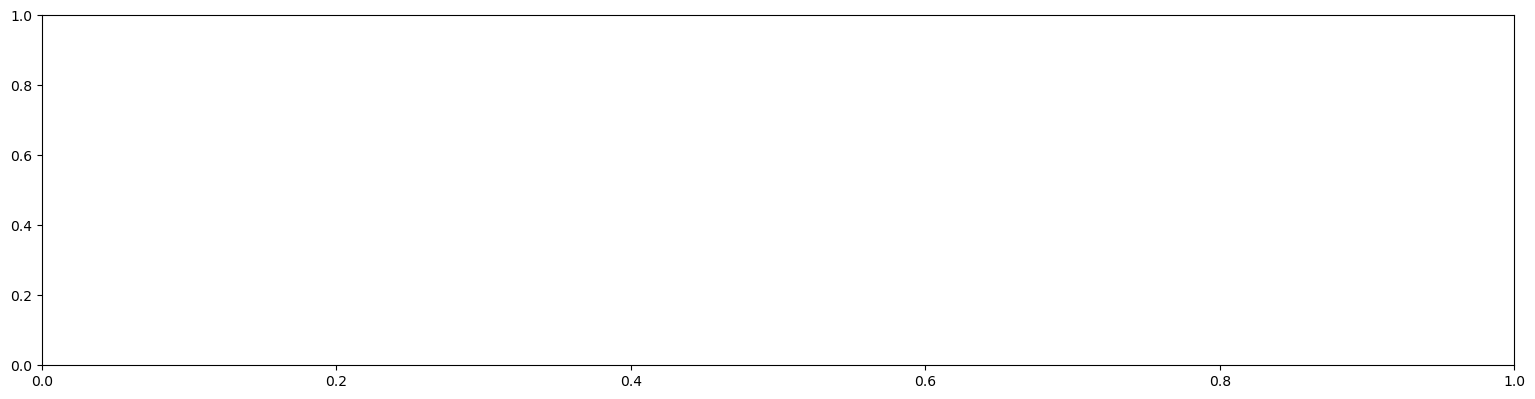

In [7]:
plt.figure(figsize = (19,10))
plt.subplot(2,1,1)
plt.plot(df_cnt.index, df_year_cnt["year_cnt_sum"], 'r')
plt.title("daily hate word in news header")
plt.xlabel("date")
plt.ylabel("count")

plt.subplot(2,1,2)
plt.plot(df_cnt.index, df_sl_cnt, 'b')
plt.title("scaled hate word in news header")
plt.xlabel("date")
plt.ylabel("count")
plt.show()

In [8]:
birth_df = pd.read_csv("출생_2011_2022.csv")
birth_df.head()
print(birth_df.index, birth_df.columns)
birth_df_1 = birth_df.drop([0,5], axis=0)
birth_df_1.head()
birth_df_1 = birth_df_1.drop([ '자치구별(1)', '시점', '모의 연령별 출생아수', '모의 연령별 출생아수.1',
       '모의 연령별 출생아수.2', '모의 연령별 출생아수.3', '모의 연령별 출생아수.4', '모의 연령별 출생아수.5',
       '모의 연령별 출생아수.6'], axis = 1)

birth_df_1.head()
birth_df_1.to_csv("2011_2022 출산율.csv")

RangeIndex(start=0, stop=13, step=1) Index(['자치구별(1)', '시점', '출생아수 (명)', '모의 연령별 출생아수', '모의 연령별 출생아수.1',
       '모의 연령별 출생아수.2', '모의 연령별 출생아수.3', '모의 연령별 출생아수.4', '모의 연령별 출생아수.5',
       '모의 연령별 출생아수.6'],
      dtype='object')


In [9]:
birth_df_2 = pd.read_csv("2011_2022 출산율.csv")
birth_df_2.drop(['Unnamed: 0'], axis =1 , inplace = True)


df_sl_birth = mm_scaler.fit_transform(birth_df_2)
print(df_sl_birth)
print(birth_df_2.columns)


[[0.95346118]
 [1.        ]
 [0.80807608]
 [0.80115762]
 [0.64183817]
 [0.44408715]
 [0.30152791]
 [0.2157585 ]
 [0.09438338]
 [0.05708216]
 [0.        ]]
Index(['출생아수 (명)'], dtype='object')


In [10]:
rev_sl_birth = np.flip(df_sl_birth)

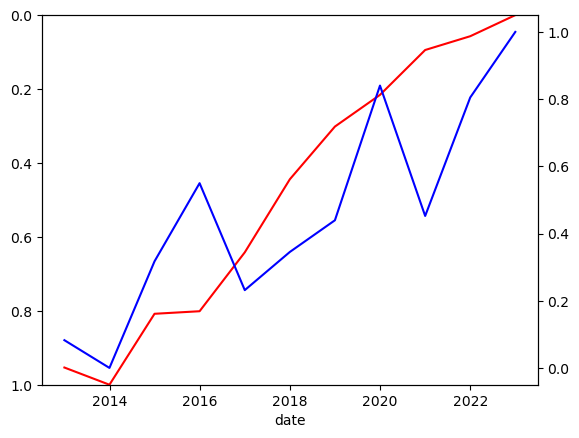

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_year_cnt.index, df_sl_birth, 'r')
ax2.plot(df_year_cnt.index, df_sl_cnt, 'b')
ax1.set_ylim(1,0)

ax1.set_xlabel('date')
plt.show()

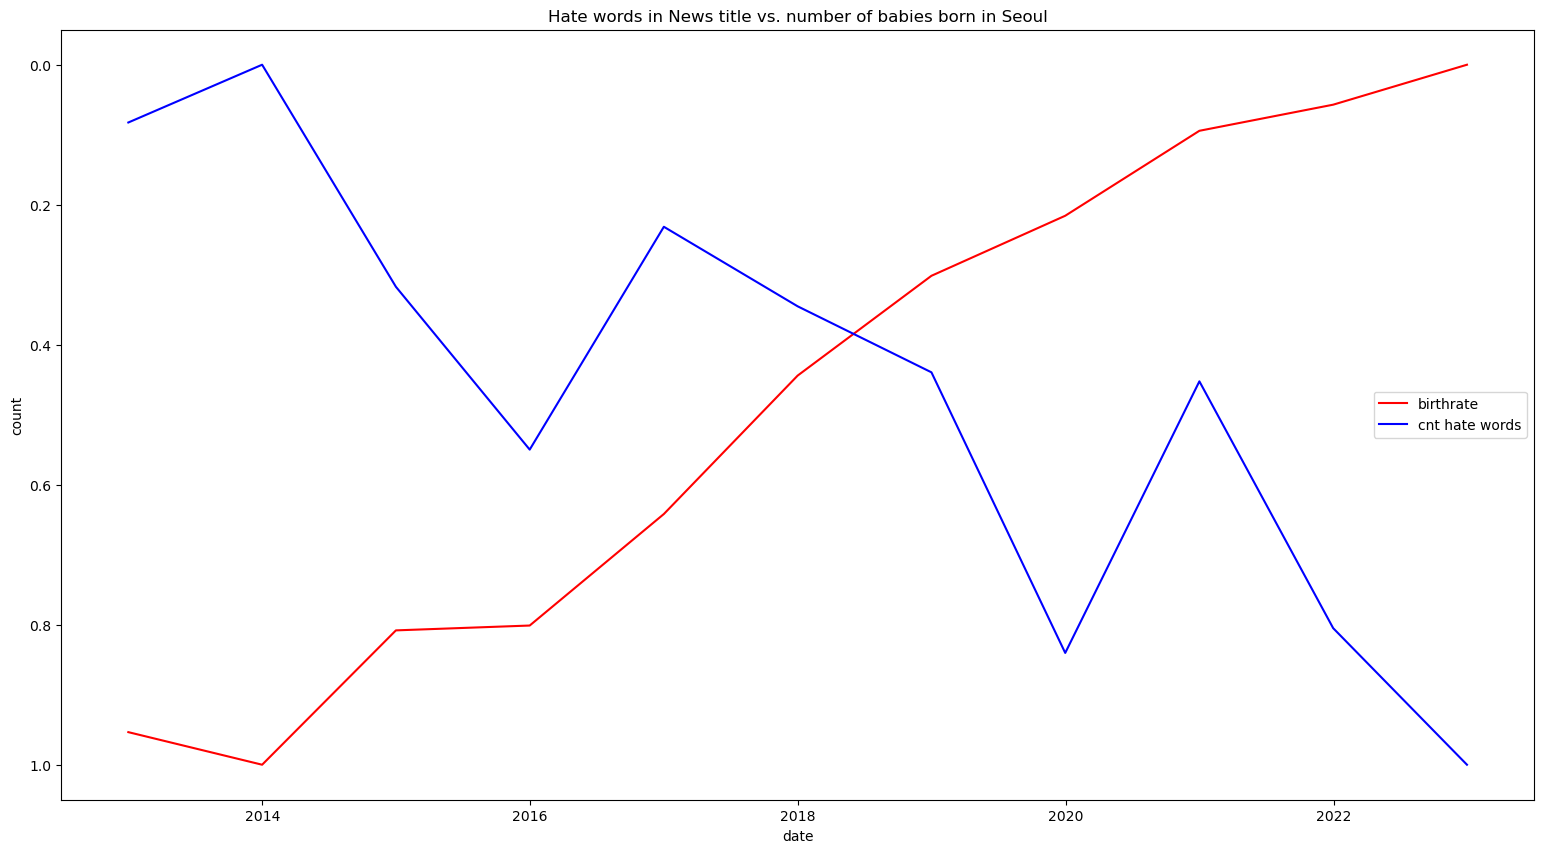

In [12]:
plt.figure(figsize = (19,10))

plt.plot(df_year_cnt.index, df_sl_birth, 'r', label = 'birthrate')
plt.gca().invert_yaxis()
plt.plot(df_year_cnt.index, df_sl_cnt, 'b', label = 'cnt hate words')
plt.title("Hate words in News title vs. number of babies born in Seoul")
plt.xlabel("date")
plt.ylabel("count")
plt.legend(ncol = 1)
plt.show()

In [13]:
type(df_sl_birth)

numpy.ndarray

In [14]:
generation = ['MZ', '꼰대', '젊은층', '잘파세대', 'Z세대', '2030', '알파세대', '2030세대']

In [27]:
li_sl_birth = df_sl_birth.tolist()
li_sl_cnt = df_sl_cnt.tolist()

df_co_b= pd.DataFrame(df_sl_birth, index = df_year_cnt.index, columns = ["sl_birth"])
df_co_c= pd.DataFrame(df_sl_cnt, index = df_year_cnt.index, columns = ["sl_cnt"])

df_co = pd.concat([df_co_b, df_co_c], axis = 1)
print(df_co)

            sl_birth    sl_cnt
2012-12-31  0.953461  0.082529
2013-12-31  1.000000  0.000000
2014-12-31  0.808076  0.317256
2015-12-31  0.801158  0.549839
2016-12-31  0.641838  0.231511
2017-12-31  0.444087  0.345123
2018-12-31  0.301528  0.439443
2019-12-31  0.215758  0.840300
2020-12-31  0.094383  0.452304
2021-12-31  0.057082  0.804930
2022-12-31  0.000000  1.000000


In [33]:
df_co.corr()

,sl_birth,sl_cnt
sl_birth,1.000000,-0.818617
sl_cnt,-0.818617,1.000000


In [17]:
df_mental = pd.read_csv("시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv",encoding='cp949')
print(df_mental)
print(df_mental.columns)

        진료년도  상별구분  시도  시군구 성별     연령구분   환자수  입내원일수     요양급여비용
0       2018  ADHD  서울  강남구  남     0~9세   437   3330  188836790
1       2018  ADHD  서울  강남구  남   10~19세  1111   8869  563498480
2       2018  ADHD  서울  강남구  남   20~29세   456   3485  213248290
3       2018  ADHD  서울  강남구  남   30~39세   174   1357   72761750
4       2018  ADHD  서울  강남구  남   40~49세    55    357   21611080
...      ...   ...  ..  ... ..      ...   ...    ...        ...
164995  2022   조현병  세종  세종시  여   60~69세    29    597   40381390
164996  2022   조현병  세종  세종시  여   70~79세    13    550   39400730
164997  2022   조현병  세종  세종시  여   80~89세     0      0          0
164998  2022   조현병  세종  세종시  여   90~99세     0      0          0
164999  2022   조현병  세종  세종시  여  100세 이상     0      0          0

[165000 rows x 9 columns]
Index(['진료년도', '상별구분', '시도', '시군구', '성별', '연령구분', '환자수', '입내원일수', '요양급여비용'], dtype='object')


In [40]:
df_mental_1 = df_mental.drop(['상별구분', '시도', '시군구', '성별', '연령구분', '입내원일수', '요양급여비용'], axis = 1)
#df_mental_18 = df_mental_1[df_mental_1['진료년도']==2018]
#df_mental_18_hm = df_mental_18.drop(['진료년도'], axis=1)
#df_mental_18_sum = df_mental_18_hm.sum()
ye_list = ['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31']
ye = 2018
df_mental_sum = pd.DataFrame()
for i in range(5) :
    df_mental_i = df_mental_1[df_mental_1['진료년도']==ye]
    df_mental_i_hm = df_mental_i.drop(['진료년도'], axis = 1)
    df_mental_i_sum = df_mental_i_hm.sum()
    df_mental_sum = pd.concat([df_mental_sum, df_mental_i_sum], axis=0)
    ye = ye + 1
nparr_sl_mental = mm_scaler.fit_transform(df_mental_sum)
li_sl_mental = nparr_sl_mental.tolist()
df_sl_mental_sum = pd.DataFrame(nparr_sl_mental, index = df_co.index[6:], columns = ["Patient"])

df_co_sum = pd.concat([df_co, df_sl_mental_sum], axis = 1)
#df_mental_sum.set_index(keys = [ye_list], inplace = True)
#df_mental_sum.columns = ['Patient']

print(df_co_sum)

            sl_birth    sl_cnt   Patient
2012-12-31  0.953461  0.082529       NaN
2013-12-31  1.000000  0.000000       NaN
2014-12-31  0.808076  0.317256       NaN
2015-12-31  0.801158  0.549839       NaN
2016-12-31  0.641838  0.231511       NaN
2017-12-31  0.444087  0.345123       NaN
2018-12-31  0.301528  0.439443  0.000000
2019-12-31  0.215758  0.840300  0.200128
2020-12-31  0.094383  0.452304  0.331964
2021-12-31  0.057082  0.804930  0.675929
2022-12-31  0.000000  1.000000  1.000000


In [60]:
ema_sl_birth = ema.ema(7, df_co_sum, 'sl_birth')
ema_sl_cnt = ema.ema(7, df_co_sum, 'sl_cnt')
ema_sl_patient = ema.ema(7, df_co_sum[6:], 'Patient')
print(ema_sl_birth)
print(ema_sl_cnt)
print(ema_sl_patient)

[0.7094110760906539, 0.7340773279597895, 0.7508474019567457, 0.7235950930952487, 0.6537181080970835, 0.5656705579982881, 0.4781925427581486, 0.3822402520951159, 0.3009507300753906]
[0.2589155217772581, 0.2735006820617753, 0.34258531862028646, 0.31481680247003796, 0.32239341642916297, 0.3516557268449161, 0.47381682192897107, 0.46843871505337353, 0.5525616193554106]
[0.3359584616527541, 0.334959769328957, 0.420201983843572]


<Figure size 1900x1000 with 0 Axes>

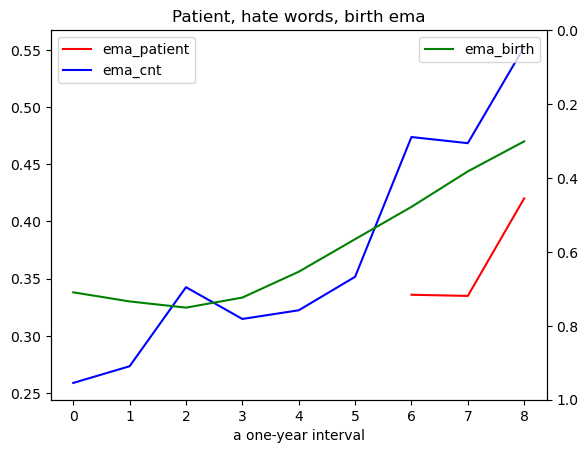

In [88]:
ema_sl_birth = ema.ema(7, df_co_sum, 'sl_birth')
ema_sl_cnt = ema.ema(7, df_co_sum, 'sl_cnt')
ema_sl_patient = ema.ema(7, df_co_sum[6:], 'Patient')

df_ema_co = pd.DataFrame({"ema_sl_birth" : ema_sl_birth, 
                          "ema_sl_cnt" : ema_sl_cnt, 
                         })
df_ema_co_pat = pd.DataFrame({"ema_sl_patient" : ema_sl_patient}, index = df_ema_co.index[6:])
df_ema_co_sum = pd.concat([df_ema_co, df_ema_co_pat], axis = 1)
plt.figure(figsize = (19,10))

#plt.plot(df_ema_co_pat["ema_sl_patient"], 'r', label = 'Patient')
#plt.plot(df_ema_co["ema_sl_cnt"], 'b', label = 'cnt hate words')
#plt.plot(df_ema_co["ema_sl_birth"], 'g', label = 'birth')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_ema_co_pat["ema_sl_patient"], 'r', label="ema_patient")
ax1.plot(df_ema_co["ema_sl_cnt"], 'b', label="ema_cnt")
ax2.plot(df_ema_co["ema_sl_birth"], 'g', label = "ema_birth")
ax2.set_ylim(1,0)
ax1.set_xlabel('a one-year interval')
plt.title("Patient, hate words, birth ema")
ax1.legend()
ax2.legend()
plt.show()
#plt.title("Patient, hate words, birth ema")
#plt.xlabel("date")
#plt.ylabel("count")
#plt.legend(ncol = 1)
#plt.show()

In [90]:
print(df_ema_co_sum)

   ema_sl_birth  ema_sl_cnt  ema_sl_patient
0      0.709411    0.258916             NaN
1      0.734077    0.273501             NaN
2      0.750847    0.342585             NaN
3      0.723595    0.314817             NaN
4      0.653718    0.322393             NaN
5      0.565671    0.351656             NaN
6      0.478193    0.473817        0.335958
7      0.382240    0.468439        0.334960
8      0.300951    0.552562        0.420202


In [91]:
df_ema_co.corr()

,ema_sl_birth,ema_sl_cnt
ema_sl_birth,1.000000,-0.936462
ema_sl_cnt,-0.936462,1.000000


In [41]:
df_co_sum_18 = df_co_sum.drop(["sl_cnt"], axis=1)
df_co_sum_18.corr()

,sl_birth,Patient
sl_birth,1.000000,-0.934266
Patient,-0.934266,1.000000


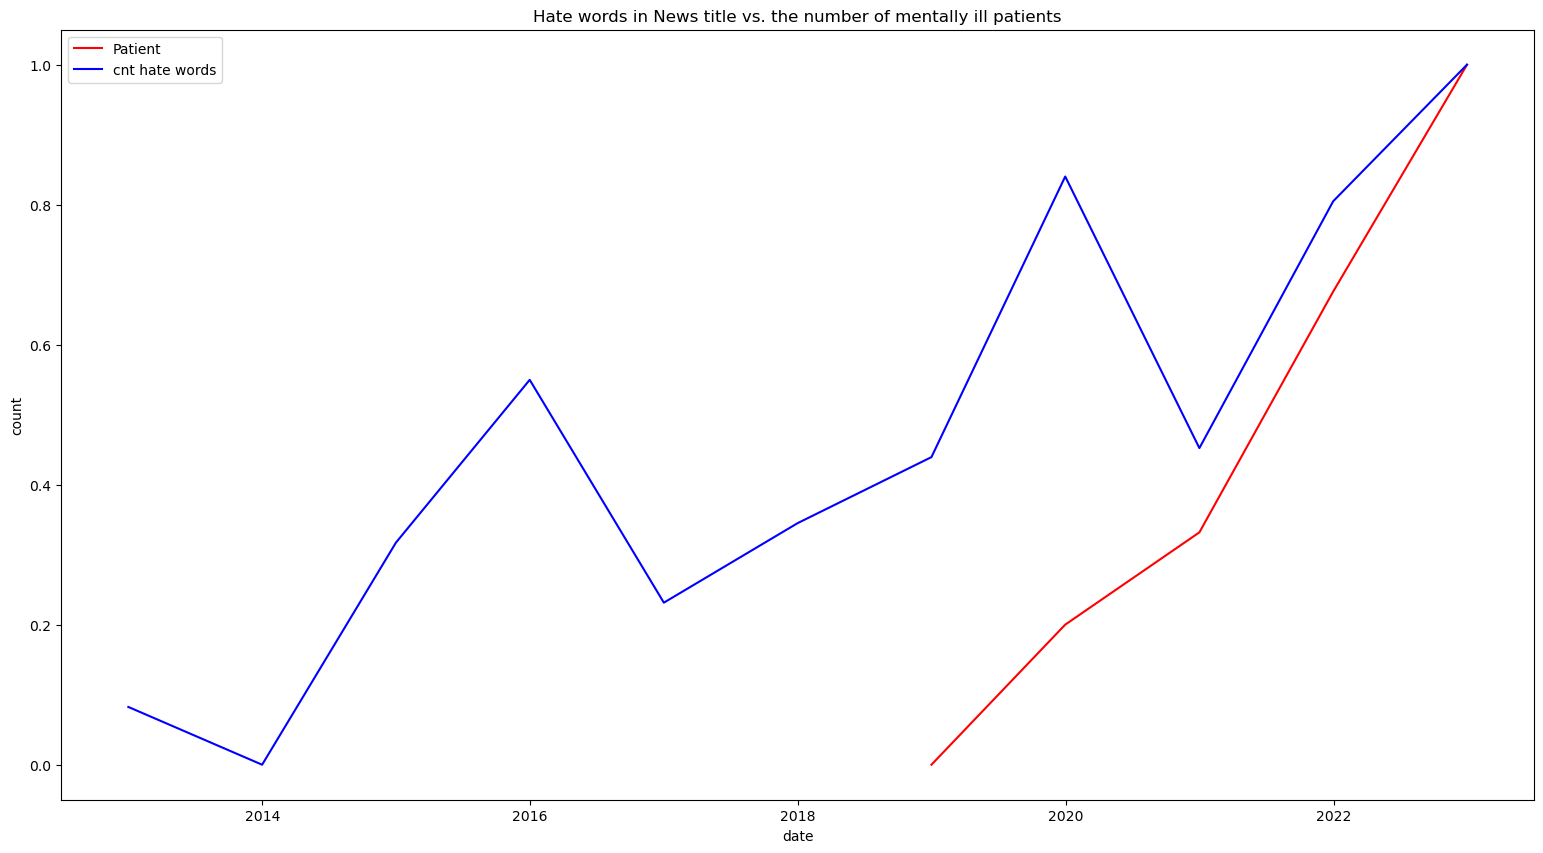

In [39]:
plt.figure(figsize = (19,10))

plt.plot(df_sl_mental_sum.index, nparr_sl_mental, 'r', label = 'Patient')
plt.plot(df_year_cnt.index, df_sl_cnt, 'b', label = 'cnt hate words')
plt.title("Hate words in News title vs. the number of mentally ill patients")
plt.xlabel("date")
plt.ylabel("count")
plt.legend(ncol = 1)
plt.show()